# Comparing data by week

In [1]:
import matplotlib.pylab as plt
import matplotlib as m

%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (14, 5)
plt.rcParams["figure.dpi"] = 600
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.size"] = 14
plt.rcParams["legend.fontsize"] = "x-large"
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
plt.rcParams.update({'figure.autolayout': True})
# plt.rcParams

In [3]:
def centered_95int(data):
    return 1.96 * (data.std() / np.sqrt(len(data)))

In [57]:
def compare_fpl_weeks(dfs, plot_output_dir):
    """
    dfs: list of dataframes with DateTime index
    """
    temp = pd.DataFrame()
    for df in dfs:
        _temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
            {"mean":"mean", "err":centered_95int}
        )
        temp = pd.concat([temp, _temp], axis=1)
    
    stds = temp.ix[:,1::2].rolling(window=3).mean()
    means = temp.ix[:,0::2].rolling(window=3).mean()

    num_weeks = len(means.columns)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for i in range(num_weeks):
        ax.plot(range(len(means)), means.ix[:, i], '.-', label="week" + str(i+1))

    ax.set_xlim([0, 24*7])
    ax.set_xticks(range(0, 24*7, 24))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
    ax.set_title("comparison over week")
    ax.set_ylabel("Proportion of all tweets")
    ax.legend(loc="best")
    ax.grid()
#     plt.savefig(plot_output_dir + "reflecting_comparison.png")

In [5]:
import pickle

In [68]:
def setup(df):
    p = 0.75
    of_interest = df.predict_fpa > p

    df["first_person_alcohol"] = 0
    df["first_person_alcohol"][of_interest] = 1
    fp_cols = [ 'predict_present', 'predict_future', 'predict_past']
    new_fp_cols = ["casual", "looking", "reflecting"]
    for new_name, old_name in zip(new_fp_cols, fp_cols):
        df[new_name] = df[old_name] >0.6

Single labeled plots

In [ ]:
df_old1 = pickle.load(open('pickles/June_labeled_all.p', 'rb'))
df_old2 = pickle.load(open('pickles/June_drinking_labeled.p', 'rb'))
df_old = pd.concat([df_old1, df_old2])

setup(df_old)
# beginning of first day to end of last day
week1o = df_old['2015-06-01':'2015-06-07']
week2o = df_old['2015-06-08':'2015-06-14']
week3o = df_old['2015-06-15':'2015-06-21']
week4o = df_old['2015-06-22':'2015-06-28']
week5o = df_old['2015-06-29':]
weekso = [week1o, week2o, week4o]

casualo = [week1o['casual'], week2o['casual'], week4o['casual']]

lookingo = [week1o['looking'], week2o['looking'], week4o['looking']]

reflectingo = [week1o['reflecting'], week2o['reflecting'], week4o['reflecting']]
compare_fpl_weeks(casualo, '')
compare_fpl_weeks(lookingo, '')
compare_fpl_weeks(reflectingo, '')

# New plots

In [59]:
df_all = pickle.load(open('pickles/June_labeled_updated_fpl.p', 'rb'))

In [60]:
setup(df_all)
# beginning of first day to end of last day
week1 = df_all['2015-06-01':'2015-06-07']
week2 = df_all['2015-06-08':'2015-06-14']
week3 = df_all['2015-06-15':'2015-06-21']
week4 = df_all['2015-06-22':'2015-06-28']
week5 = df_all['2015-06-29':]
weeks = [week1, week2, week4]

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


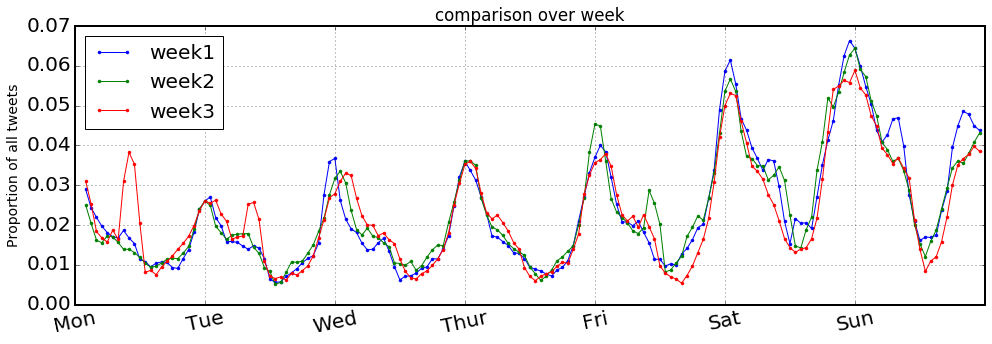

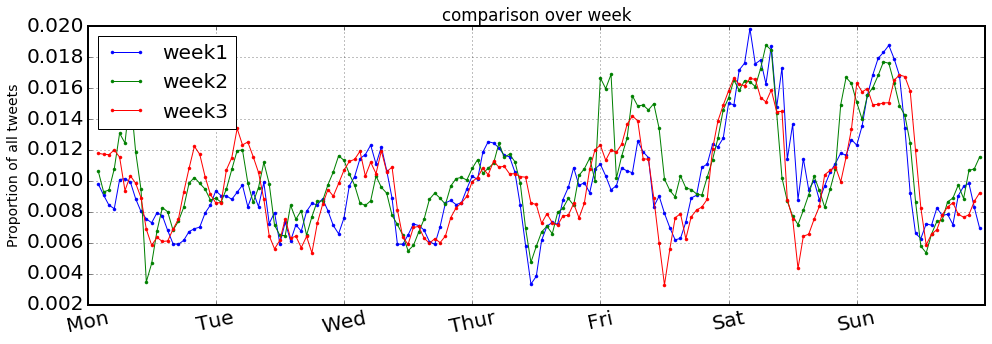

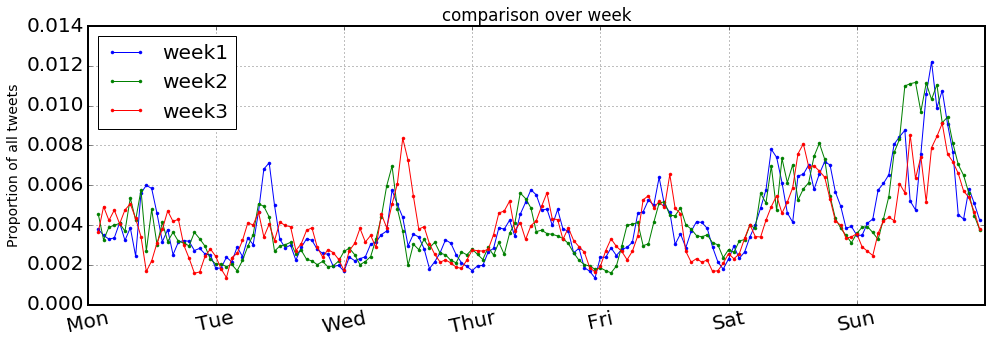

In [61]:
casual = [week1['casual'], week2['casual'], week4['casual']]
looking = [week1['looking'], week2['looking'], week4['looking']]
reflecting = [week1['reflecting'], week2['reflecting'], week4['reflecting']]
compare_fpl_weeks(casual, '')
compare_fpl_weeks(looking, '')
compare_fpl_weeks(reflecting, '')

In [37]:
weird_bump = df_all['2015-06-22 8:00':'2015-06-22 12:00']
weird_bump[weird_bump.predict_present > 0.6].sample(5)

,_id,created_at,id,predict_alc,predict_fpa,predict_fpa|alc,text,predict_present|fpa,predict_future|fpa,predict_past|fpa,predict_present,predict_future,predict_past,first_person_alcohol,casual,looking,reflecting
created_at,,,,,,,,,,,,,,,,,
2015-06-22 10:19:07,5587e119d6dfbb56637c899e,Mon Jun 22 10:19:07 +0000 2015,612927788526489600,0.999996,0.783053,0.783056,May 17th - Drinking a Wake Up by @hpbrewery @ ...,0.999777,0.000138,0.000084,0.782879,0.000108,0.000066,1,True,False,False
2015-06-22 10:26:19,5587e2c9d6dfbb56637c8c9d,Mon Jun 22 10:26:19 +0000 2015,612929600608423936,0.999985,0.770206,0.770218,May 17th picking up my bottles - Drinking a Ch...,0.999136,0.000306,0.000558,0.769541,0.000236,0.000430,1,True,False,False
2015-06-22 09:22:11,5587d3c2d6dfbb503f135792,Mon Jun 22 09:22:11 +0000 2015,612913462444969984,0.994918,0.663905,0.667297,Copperversary! May 16th. - Drinking a Vlad the...,0.995168,0.001717,0.003116,0.660697,0.001140,0.002068,0,True,False,False
2015-06-22 10:24:14,5587e24dd6dfbb56637c8bc0,Mon Jun 22 10:24:14 +0000 2015,612929077855547392,0.999997,0.797367,0.797370,May 17th - Drinking a Wake Up by @hpbrewery @ ...,0.999575,0.000263,0.000161,0.797029,0.000210,0.000129,1,True,False,False
2015-06-22 10:26:19,5587e2cad6dfbb56637c8c9e,Mon Jun 22 10:26:19 +0000 2015,612929601984180224,0.999715,0.704790,0.704991,Literally it is 6:30 am and I am wide awake an...,0.933100,0.034234,0.032666,0.657640,0.024128,0.023023,0,True,False,False


In [8]:
import os

In [10]:
file_dir = 'E:/march labeled/date_indexed/'
df = pd.DataFrame()
for file in os.listdir(file_dir):
    df = pd.concat([df, pickle.load(open(file_dir + file, 'rb'))])

In [11]:
df.shape

(5345292, 12)

In [12]:
df.index

DatetimeIndex(['2015-03-01 00:01:10', '2015-03-01 00:01:10',
               '2015-03-01 00:01:11', '2015-03-01 00:01:11',
               '2015-03-01 00:01:11', '2015-03-01 00:01:11',
               '2015-03-01 00:01:11', '2015-03-01 00:01:11',
               '2015-03-01 00:01:11', '2015-03-01 00:01:12',
               ...
               '2015-03-07 03:26:12', '2015-03-07 03:26:12',
               '2015-03-07 03:26:13', '2015-03-07 03:26:13',
               '2015-03-07 03:26:10', '2015-03-07 03:26:11',
               '2015-03-07 03:26:11', '2015-03-07 03:26:11',
               '2015-03-07 03:26:11', '2015-03-07 03:26:11'],
              dtype='datetime64[ns]', name='created_at', length=5345292, freq=None)

In [63]:
setup(df)

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


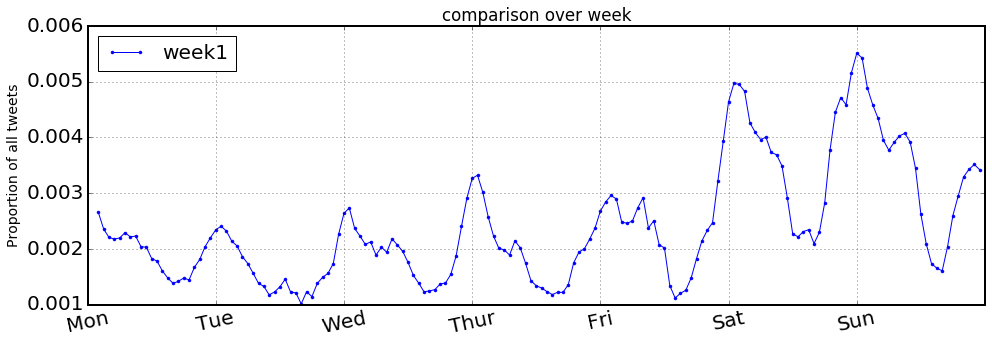

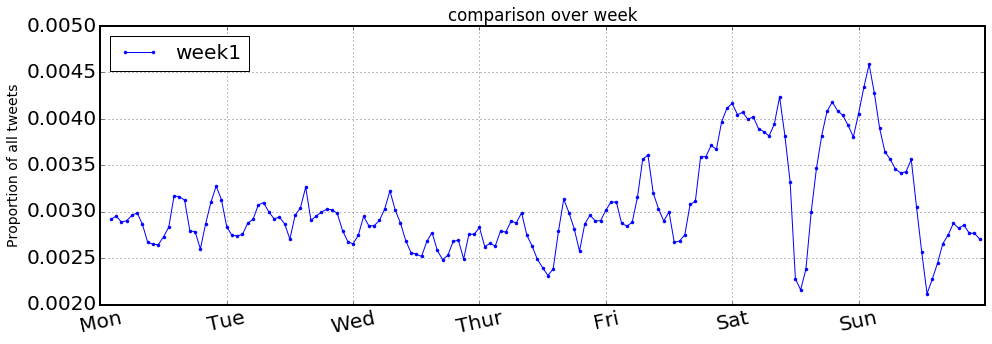

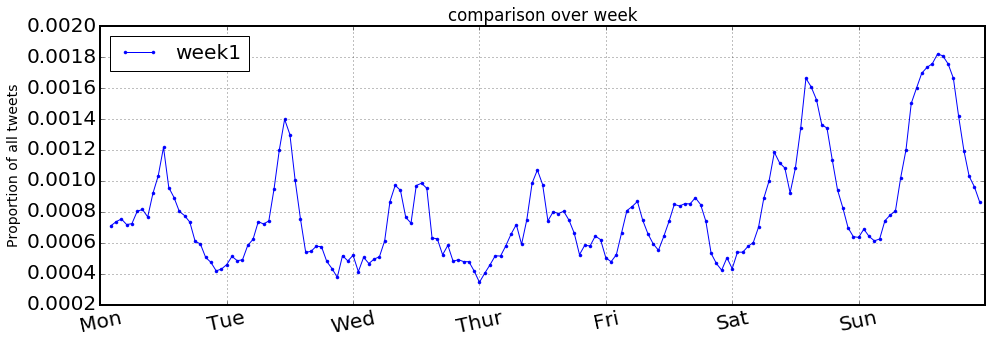

In [64]:
compare_fpl_weeks([df['casual']], '')
compare_fpl_weeks([df['looking']], '')
compare_fpl_weeks([df['reflecting']], '')

In [37]:
keywords = set('''drink drinker drinks drinking drank wine champgne alcohol alcoholics alcoholism beer beers bottle bottles
    pint pints cocktail cocktails bar brewery lounge pub liquor booze vodka tequila gin ciroc margarita margaritas shot shots
    ale whiskey lager tipsy drunk sober wasted pregame pregaming'''.split())

def prefilter(text):
    return bool(set(text.split()).intersection(keywords))

In [38]:
%%time
drinking = df[df.text.apply(prefilter)]

Wall time: 45.8 s


In [39]:
drinking.shape

(42463, 16)

In [69]:
setup(drinking)

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tom Work\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipyke

C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


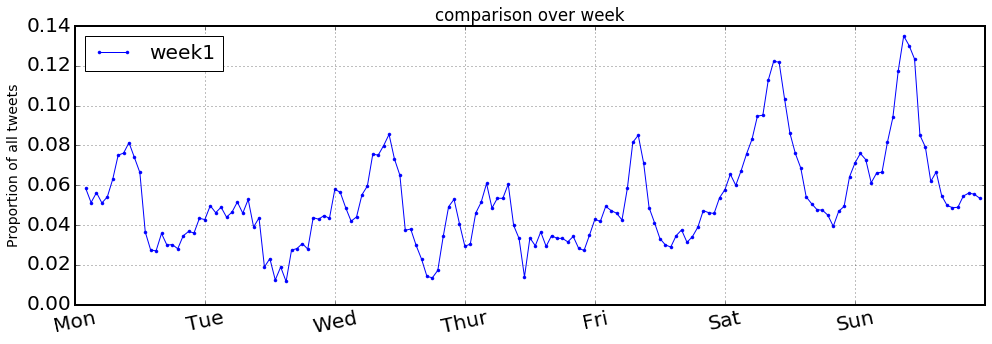

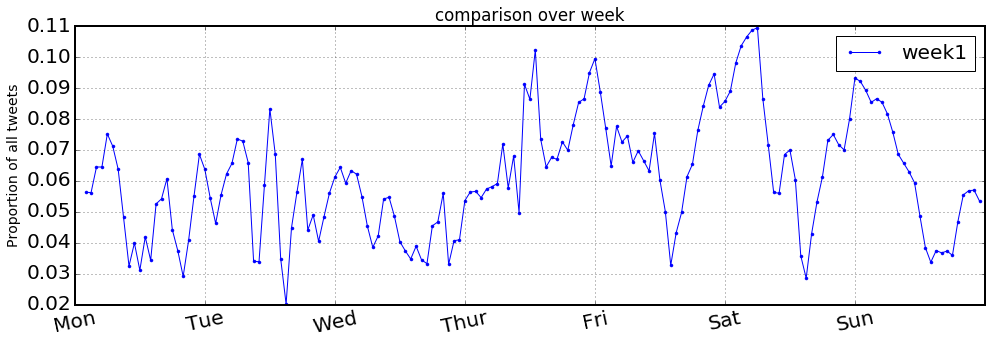

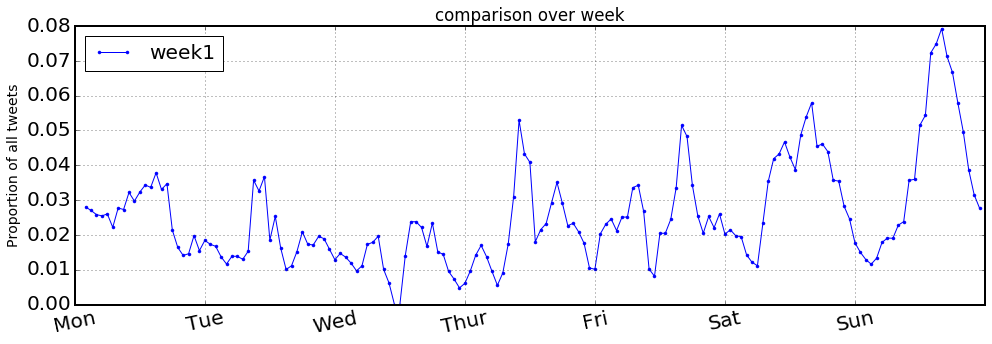

In [70]:
compare_fpl_weeks([drinking['casual']], '')
compare_fpl_weeks([drinking['looking']], '')
compare_fpl_weeks([drinking['reflecting']], '')

In [2]:
def plot_fps_week(df, folder):
    temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
        {
            _:{"mean":"mean", "err":centered_95int} for _ in ['casual', 'looking', 'reflecting']
        }
    )
    stds = pd.rolling_mean(temp[[1,3,5]], 3)
    means = pd.rolling_mean(temp[[0,2,4]], 3)

    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]


    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.plot(range(len(means)), means.casual, "r.-", label="casual")
    ax.fill_between(
        x=range(len(means)),
        y1=means.casual - stds.casual,
        y2=means.casual + stds.casual,
        color='r', alpha=.1
    )


    ax.plot(range(len(means)), means.looking, "g.:", label="looking")
    ax.fill_between(
        x=range(len(means)),
        y1=means.looking - stds.looking,
        y2=means.looking + stds.looking,
        color="g", alpha=.1
    )



    ax.plot(range(len(means)), means.reflecting, "b.--", label="reflecting")
    ax.fill_between(
        x=range(len(means)),
        y1=means.reflecting - stds.reflecting,
        y2=means.reflecting + stds.reflecting,
        color="b", alpha=.1
    )


    ax.set_xlim([0, 24*7])

    ax.set_xticks(range(0, 24*7, 24))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
    ax.set_title("Alcohol - First Person state over week")
    ax.set_ylabel("Proportion of all tweets")
    ax.legend(loc="best")
    ax.grid()
#     plt.savefig(folder + "plt_levels_weekhour_test_alc.png")

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


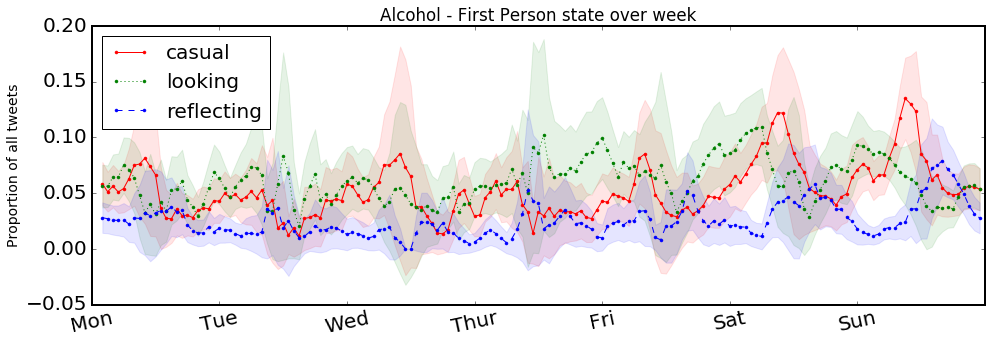

In [72]:
plot_fps_week(drinking, '')

In [1]:
drinking[drinking.looking].text.sample(5)

NameError: name 'drinking' is not defined